In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #for evaluating matrix
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)



In [3]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# data= pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/diabetes.csv", names=col_names)
# #data= pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/diabetes.csv")
# Read with header row
data = pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/diabetes.csv")
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 'age', 'label']


In [4]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [27]:
data.shape

(769, 9)

In [28]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [29]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [7]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = data[feature_cols]
y = data['label']


In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6623376623376623


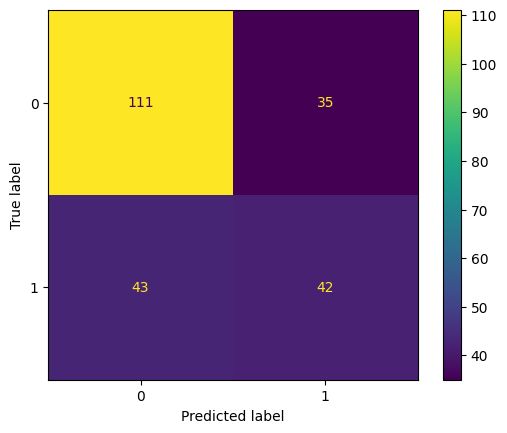

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [13]:
TP = 115  # True Positive
FP = 44   # False Positive
FN = 31   # False Negative
TN = 41   # True Negative

# Accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)
print("Accuracy:", accuracy)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

recall = TP / (TP + FN)
print("Recall:", recall)

f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1)

Accuracy: 0.6753246753246753
Precision: 0.7232704402515723
Recall: 0.7876712328767124
F1 Score: 0.7540983606557377


In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)  # no pruning
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


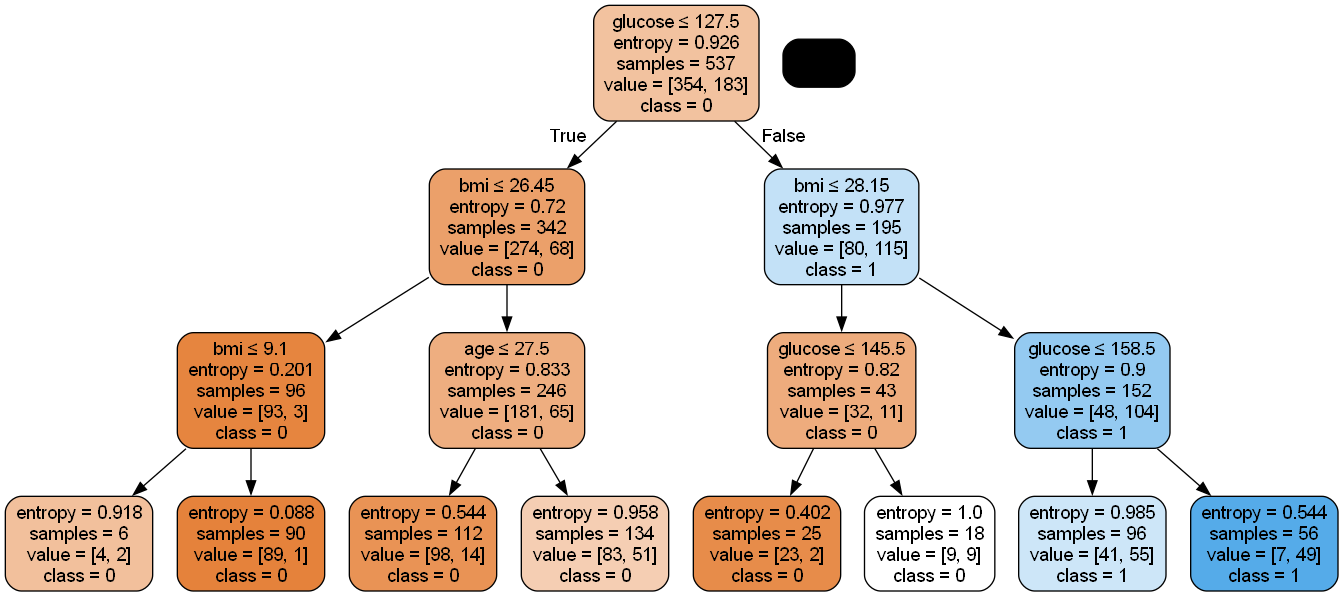

In [15]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from io import StringIO

from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


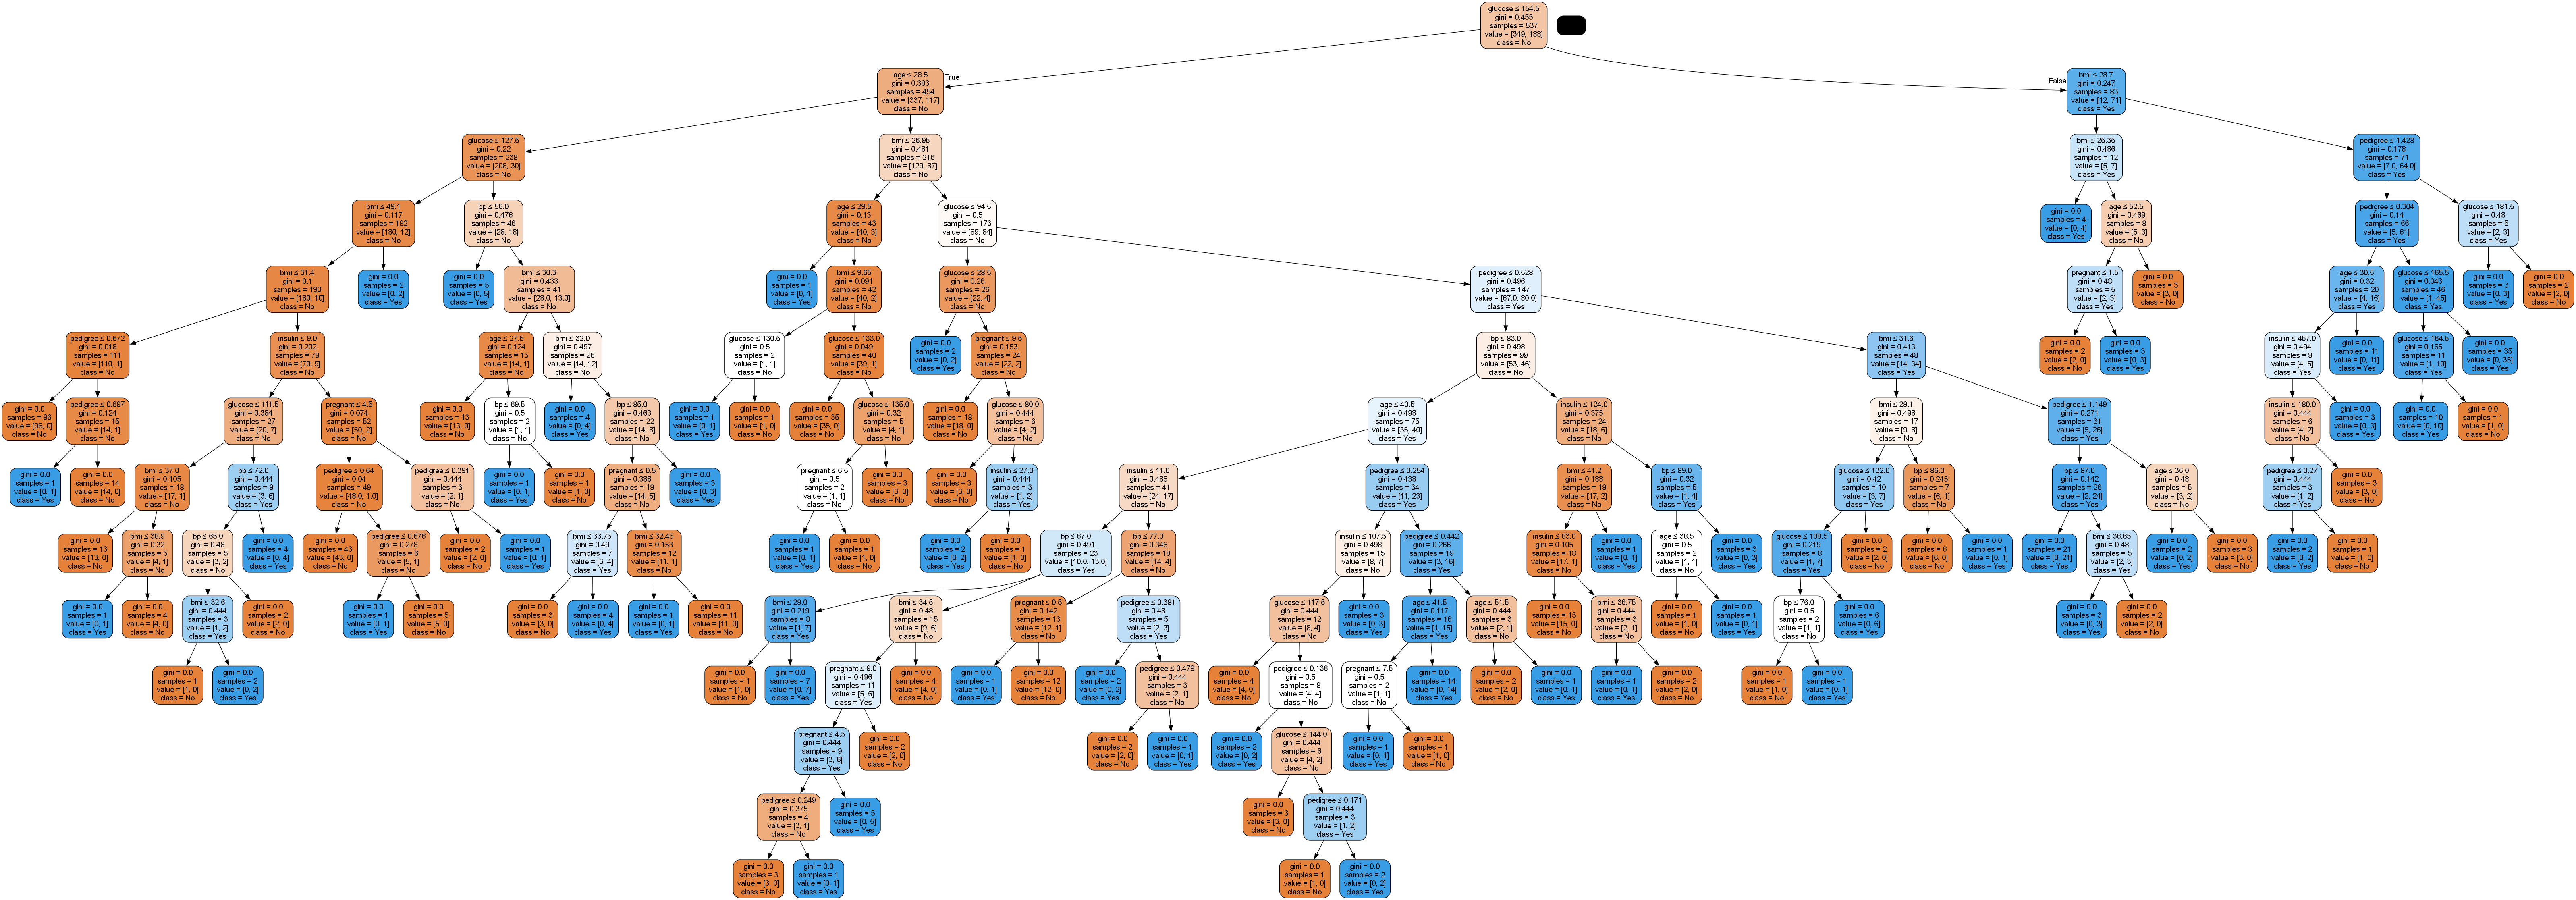

In [20]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
